# Audio Collager Scratchpad

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from lib.util import Util

In [13]:
WAV_A = 'docs/audio/breaks/black_heat__zimba_ku.wav'

audio = Util.read_audio(WAV_A)

windows = [50,100,200,500]
results = []
for w in windows:
    slices = Util.chop_audio(audio, w)
    for s in slices:
        Util.extract_features(s)
    while len(slices) > 1:
        s1 = slices.pop()
        for s2 in slices:
            d_mfcc = Util.mfcc_dist(s1, s2)
            #d_chroma = Util.chroma_dist(s1, s2)
            
            res = {
                'mfcc_dist': d_mfcc,
            #    'chroma_dist': d_chroma,
                'window_ms': w
            }
            results.append(res)

/Users/jessebordoe/Library/Caches/pypoetry/virtualenvs/audio-collage-YcqdbNBC-py3.9/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


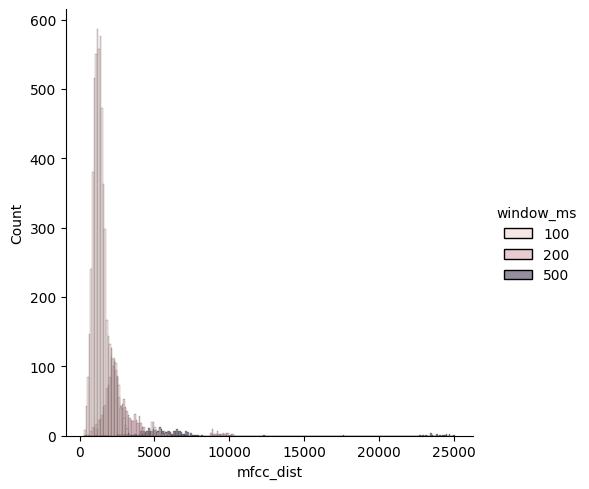

In [18]:
df_dist = pd.DataFrame(results)

sns.displot(data=df_dist[df_dist.window_ms > 50], x='mfcc_dist', hue='window_ms')